In [135]:
import matplotlib.pyplot as plt
import random
import math

In [21]:
aa_deltaG = { 'A': 1,   # Alanine
             'C': 0.17,  # Cysteine
             'D': -3,    # Aspartic Acid
             'E': -2.6,  # Glutamic Acid
             'F': 2.5,   # Phenylalanine
             'G': 0.67,  # Glycine
             'H': -1.7,  # Histidine
             'I': 3.1,   # Isoleucine
             'K': -4.6,  # Lysine
             'L': 2.2,   # Leucine
             'M': 1.1,   # Methionine
             'N': -2.7,  # Asparagine
             'P': -0.29, # Proline
             'Q': -2.9,  # Glutamine
             'R': -7.5,  # Arginine
             'S': -1.1,  # Serine
             'T': -0.75, # Threonine
             'V': 2.3,   # Valine
             'W': 1.5,   # Tryptophan
             'Y': 0.08 } # Tyrosine

In [154]:
#Problema 1
#protein = "ACDEF..."
#estructura = "INSWWE"
#res = (0,0)=["A","C"], (0,1)="B"
#Asumimos que protein y structure tienen la misma longitud y solo se puede hacer un movimiento por proteina.
def get_spatial_dic(protein, structure): 
    
    #Inicializamos el diccionario que devolveremos si no hay solapamientos
    res = dict()
    
    #Las coordenadas por defecto de inicio son (x,y) = 0,0
    afterCords= [0,0]
    
    #Recorremos la cadena de proteinas
    for i in range (0,len(protein)):
        
        #Si la proteina está en delta entonces y la primera proteía es "I" seguimos, en el caso de que no, paramos
        if(protein[i] in aa_deltaG):
            if(i==0 and structure[i]!="I"):
                return dict()
            
            #Si la proteina es la I, como es el caso inicial suponemos que está en 0,0
            if(structure[i] == "I"):
                res[(0,0)]=protein[i]
                
            #En cualquier otro caso
            else:
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y"
                if(structure[i]=="N"):
                    afterCords= [afterCords[0],afterCords[1]+1]
                    newCords = tuple(afterCords)
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
                elif(structure[i]=="S"):
                    afterCords= [afterCords[0],afterCords[1]-1]
                    newCords = tuple(afterCords)
                    
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
                elif(structure[i]=="E"):
                    afterCords= [afterCords[0]+1,afterCords[1]]
                    newCords = tuple(afterCords)
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
                elif(structure[i]=="W"):
                    afterCords= [afterCords[0]-1,afterCords[1]]
                    newCords = tuple(afterCords)
                    
                #En el caso de que las nuevas coordenadas no estén el diccionario las añadimos, en el caso de que estén,
                #Significa que existe solapamiento, por tanto devolvemos uno vacío
                if(newCords not in res):
                    res[newCords]=protein[i]
                else:
                    return dict()
        else:
            return dict()
    return res

        

In [23]:
get_spatial_dic("ACDEF","IWNNN")

{(0, 0): 'A', (-1, 0): 'C', (-1, 1): 'D', (-1, 2): 'E', (-1, 3): 'F'}

In [24]:
# Problema 2.1
# input: aa "aminoacid" ej: "A", "C", "D",
# output: True (hidrophobic) or false (hidrophilic)

def is_hidrofobic(aa):
    hidrophobic_limit = -1.5

    return aa_deltaG[aa] > hidrophobic_limit

In [25]:
print(is_hidrofobic('A'))
print(is_hidrofobic('D'))
print(is_hidrofobic('S'))        

True
False
True


In [26]:
# Problema 2.2
# input: 
#    dic "dictionary that represents 2d structure of the protein" ej: {(0,0): A, (0,1): D ... }
# output: score

def get_N(dic, coords):
    res = 0
    x = coords[0]
    y = coords[1]
    
    if ((x+1, y) not in dic):
        res+=1
    if ((x, y+1) not in dic):
        res+=1
    if ((x-1, y) not in dic):
        res+=1
    if ((x, y-1) not in dic):
        res+=1
        
    return res

def get_score(dic):
    res = 0
    for coords in dic:
        
        aminoacid = dic[coords]
        N = get_N(dic,coords)
        
        res += aa_deltaG[aminoacid] * N
        if is_hidrofobic(aminoacid):
            res += 10 * N
    return res

In [27]:
get_score({(0,0): "A", (0,1): "D"})

24

In [28]:
def get_coords(structure):
     #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y"
    afterCords= (0,0)
    coords = list()
    coords.append(afterCords)
    
    #Cambiar
    for i in range (1,len(structure)):
        if(structure[i]=="N"):
            afterCords= [afterCords[0],afterCords[1]+1]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
        elif(structure[i]=="S"):
            afterCords= [afterCords[0],afterCords[1]-1]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
        elif(structure[i]=="E"):
            afterCords= [afterCords[0]+1,afterCords[1]]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
        elif(structure[i]=="W"):
            afterCords= [afterCords[0]-1,afterCords[1]]
            newCords = tuple(afterCords)
        coords.append(newCords)
    return coords

In [29]:
get_coords("INNW")

[(0, 0), (0, 1), (0, 2), (-1, 2)]

In [30]:
# Ejercicio 3


def fold_backwards(direction):
    if direction == "N":
        return "W"
    elif direction == "W":
        return "S"
    elif direction == "S":
        return "E"
    elif direction == "E":
        return "N"
    else:
        return direction
    
def fold_forwards(direction):
    if direction == "N":
        return "E"
    elif direction == "W":
        return "N"
    elif direction == "S":
        return "W"
    elif direction == "E":
        return "S"
    else:
        return direction
    
def fold(structure, pos, angle):
    coords = get_coords(structure)
    
    res = ""
    folding = False
    for i in range(0, len(coords)):
        coord = coords[i]
        direction = structure[i]
        
        if folding:
            if angle == 90:
                res += fold_backwards(direction)
            if angle == -90:
                res += fold_forwards(direction)
        else:
            res+= direction
            
        if coord == pos:
            folding = True
            
    return res        

In [31]:
fold("INNW", (0,1), 90)

'INWS'

In [32]:
fold("INNW", (0,1), -90)

'INEN'

In [138]:
# Ejercicio 3.2

def get_successors(protein, structure):
    coords = get_coords(structure)
    
    if len(protein) != len(structure):
        return {}
    
    res = {}
    for coord in coords:
        folded_backwards = fold(structure, coord, 90)
        folded_forwards = fold(structure, coord, -90)
        
        backwards_dic = get_spatial_dic(protein, folded_backwards)
        forwards_dic = get_spatial_dic(protein, folded_forwards)
        
        if backwards_dic:
            res[folded_backwards] = backwards_dic
            
        if forwards_dic:
            res[folded_forwards] = forwards_dic
            
    return res

In [139]:
get_successors("ADADDDD", "INWSWNE")

{'INWSSWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-1, -1): 'D',
  (-2, -1): 'D',
  (-2, 0): 'D'},
 'INWSWWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-3, 0): 'D',
  (-3, 1): 'D'},
 'INWSWNN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-2, 1): 'D',
  (-2, 2): 'D'}}

In [177]:
# Ejercicio 4

def simmulating_annealing(protein):
    T_0 = 100
    L = 100
    T_f = 0
    
    T = T_0
    actual_structure = "I" + "N" * (len(protein) - 1)
    
    while T >= T_f:
        
        for i in range(1,L+1):
            candidate_structure_dic = get_successors(protein, actual_structure)
            x = random.randint(0, len(candidate_structure_dic)-1)
            keys = list(candidate_structure_dic.keys())
            candidate_structure = keys[x]
            
#             print(str(candidate_structure) + "  " + str(i) + "\n")
            candidate_dic = get_spatial_dic(protein, candidate_structure)
            actual_dic = get_spatial_dic(protein, actual_structure)
            delta = get_score(candidate_dic) - get_score(actual_dic)
            
            if random.random() < math.pow(math.e, -delta/T) or delta < 0:
                actual_structure = candidate_structure
                
        T = T / 2
        
    return actual_structure

In [ ]:
# ("ACDEAFSDSGFLKQA", "INNWSWNNNEENESE")

simmulating_annealing("ACDEAFSDSGFLKQA")

INNNNEEEEEEEEEE  1

INNEESSSSSSSSSS  2

INNEESEEEEEEEEE  3

INNEESEEEENNNNN  4

INNENENNNNWWWWW  5

INNENENNNNWWWWW  6

INNENEEEEENNNNN  7

INNENEEEEENNNNN  8

INNENEEESSEEEEE  9

INNENEEESSEEESS  10

IWWNWNNNEENNNEE  11

IWWNWWWWNNWWWNN  12

ISSWSSSSWWSSSWW  13

ISSWSSSSWWSWWNN  14

ISWNWWWWNNWNNEE  15

IWNENNNNEENEESS  16

IWNENNEESSESSWW  17

IWNENNEESENEESS  18

IWNENNENENWNNEE  19

IWNENNENENWWWNN  20

INESEESESENNNEE  21

IWNENNENENWWWNN  22

IWNENNNWNWSSSWW  23

IWNENNNWNWSSSSS  24

IWNENNNWNWSSSWW  25

INESEEENENWWWNN  26

INESESSESENNNEE  27

IWNENEENENWWWNN  28

IWNENEENENWWWNE  29

IWNENNNWNWSSSWN  30

IWNENNNWNWSSSSW  31

IWNENNNWNWSSWWN  32

INESEEENENWWNNE  33

IESWSSSESENNEES  34

IESWSSSESENNNNE  35

IESWSSSESENNEES  36

IESWWWWSWSEESSW  37

IESWWWWSWSSSWWN  38

IESWWWWSWWWWNNE  39

IESWWWWSWWWWWWN  40

IESWWSSESSSSSSW  41

IESWWSSESSSSEES  42

IESWWSSSWWWWSSW  43

IESWWSSSWWWWSES  44

IESWWSSESSSSENE  45

INESSEENEEEENWN  46

INESSESESSSSENE  47

INESSESESSEENWN  48

I


IWNWWWNWWSESSEN  12

ISWSEESEENWNNWS  13

ISWSESWSSENEENW  14

ISWWSSWSSENEENW  15

ISWSEESSSENEENW  16

ISWSEESSSENEENW  17

ISWSEESEENNEENW  18

ISWSEESSSENEENW  19

ISWSESWSSENEENW  20

ISWSEESSSENEENW  21

ISWSSSWSSENEENW  22

ISWSESWSSENEENW  23

ISWWSSWSSENEENW  24

ISWSEESSSENEENW  25

ISWSEESEEENEENW  26

ISWSEESEENWNENW  27

IESENNENNWSWWSE  28

IESSEESEENWNNWS  29

IESENNENNWSWWWS  30

IESENNENNNWNNWS  31

IESENNENNWSWNWS  32

ISWSEESEENWNNWS  33

IWNWSSWSSENEENW  34

IWNNWWNWWSESSEN  35

IWNNWWNWWSESSEN  36

IWNWSWNWWSESSEN  37

IWNWWWNWWSESSEN  38

IWNWSSWSSENESEN  39

IWNWSSWSSENEEEN  40

IWNWSSWSSENEENW  41

INENWWNWWSESSEN  42

INENNNENNWSWWSE  43

INENWWNWNWSWWSE  44

INENNNENNWSWWSE  45

INENWWNWWWSWWSE  46

INENWWNWWSSWWSE  47

INENWWNWNWSWWSE  48

INENNNENNWSWWSE  49

IESENNENNWSWWSE  50

IESENNENNWSWNWS  51

IESENNENENWNNWS  52

IESEEESEENWNNWS  53

INENWWNWWSESSEN  54

INENWNENNWSWWSE  55

IWNWSSWSSENEENW  56

IWNWSSWWWSESSEN  57

IWNWSSWSSEESSEN  58

IWNWSSWSSENE


ISWSEESEENWNNWS  34

IESENNENNWSWWSE  35

IESEEESEENWNNWS  36

ISWSEESEENWNNWS  37

ISWSSSWSSENEENW  38

ISWWSSWSSENEENW  39

ISWSEESEENNEENW  40

ISWSEESEENWNNNW  41

ISWSEESEENNEENW  42

ISWSESWSSENEENW  43

ISWSEESEENWNNWS  44

ISWSEESESENEENW  45

ISWSEESESENEENW  46

ISWSEESSSENEENW  47

ISWSEESSSENEENW  48

ISWSESWSSENEENW  49

IWNWSSWSSENEENW  50

IWNWSSWSSENEENW  51

IWNWSSWSSENESEN  52

IWNWWWNWWSESSEN  53

IWNWSSWSSENESEN  54

IWNWSSWSSENEEEN  55

IWNWWWNWWSESSEN  56

ISWSEESEENWNNWS  57

ISWSEESEENWNNWS  58

ISWSSSWSSENEENW  59

ISWSESWSSENEENW  60

IESENNENNWSWWSE  61

IESENNENNWSWWWS  62

IESENNEEENWNNWS  63

IESENESEENWNNWS  64

IESENNENNWWNNWS  65

IESENNENNWSWWSE  66

IESENNENNWWNNWS  67

IESENNEEENWNNWS  68

IESENNENNWWNNWS  69

IESENESEENWNNWS  70

IESENESEENWNNWS  71

IESENNENNNWNNWS  72

IESSEESEENWNNWS  73

IESENNENNWSWNWS  74

IESENNENNWSWWWS  75

IESENNENNWWNNWS  76

IESENNEEENWNNWS  77

IESENNENNNWNNWS  78

IESENNENNWSWWWS  79

IESEEESEENWNNWS  80

ISWSEESEENWN


ISWSSSWSSENEENW  44

ISWSEESEENWNNWS  45

ISWSEESEENNEENW  46

ISWSEESEENWNENW  47

ISWSEESEEENEENW  48

ISWSESWSSENEENW  49

ISWSEESEENWNNNW  50

ISWSSSWSSENEENW  51

ISWSEESEENWNNNW  52

ISWSEESESENEENW  53

ISWSEESEENWNNWS  54

ISWSESWSSENEENW  55

IESENNENNWSWWSE  56

IESENESEENWNNWS  57

INENWWNWWSESSEN  58

INEENNENNWSWWSE  59

INENWWNWWWSWWSE  60

INENWWNWWSESWSE  61

INEENNENNWSWWSE  62

INENWWNWNWSWWSE  63

INENWWNWWSESWSE  64

IESENNENNWSWWSE  65

IESENNENNWSWWWS  66

IESENNENNWSWNWS  67

IESENNENNNWNNWS  68

IESENESEENWNNWS  69

IESENNENNWSWWSE  70

IESENNENNWWNNWS  71

IESSEESEENWNNWS  72

ISWSEESEENWNNWS  73

ISWSEESEENWNNNW  74

ISWSEESSSENEENW  75

ISWSEESEENWNNNW  76

ISWSEESEENWNNWS  77

ISWWSSWSSENEENW  78

ISWSEESEENWNNNW  79

ISWSEESEEENEENW  80

ISWSEESEENWNENW  81

ISWSEESESENEENW  82

ISWSEESSSENEENW  83

ISWSEESEENNEENW  84

ISWSEESEENWNNNW  85

ISWSEESSSENEENW  86

ISWSESWSSENEENW  87

ISWSEESESENEENW  88

ISWSESWSSENEENW  89

ISWSEESEEENEENW  90

ISWSSSWSSENE


IESSEESEENWNNWS  39

IESENESEENWNNWS  40

ISWSEESEENWNNWS  41

ISWSEESEENNEENW  42

IESENNENNWSWWSE  43

IESENNENENWNNWS  44

IESENESEENWNNWS  45

IESENNENNWSWWWS  46

IESENNENNNWNNWS  47

IESENNENNWSWWWS  48

IESENNENNNWNNWS  49

IESENNENNWSWWWS  50

IESENNENNWSWWSE  51

IESENNENENWNNWS  52

IESEEESEENWNNWS  53

IESENNENNWWNNWS  54

IESENNEEENWNNWS  55

IESENESEENWNNWS  56

IESENESEENWNNWS  57

IESENESEENWNNWS  58

IESENESEENWNNWS  59

IESEEESEENWNNWS  60

IESSEESEENWNNWS  61

INENWWNWWSESSEN  62

INENWNENNWSWWSE  63

IWNWSSWSSENEENW  64

ISWSEESEENWNNWS  65

ISWWSSWSSENEENW  66

ISWSEESEENNEENW  67

ISWSEESEENNEENW  68

ISWSEESEENWNNWS  69

IWNWSSWSSENEENW  70

IWNWSSWWWSESSEN  71

IWNWSSWSSENEENW  72

IWNWSSWSSEESSEN  73

IWNWSSWSSEESSEN  74

IWNWWWNWWSESSEN  75

IWNWSSWSSEESSEN  76

IWNWSSWSSENEEEN  77

IWNWSSWSSEESSEN  78

ISWSEESEENWNNWS  79

ISWSESWSSENEENW  80

ISWSESWSSENEENW  81

ISWSEESEENWNNWS  82

IWNWSSWSSENEENW  83

IWNWSSWSSENESEN  84

IWNWWWNWWSESSEN  85

IWNNWWNWWSES


IWNWSSWSSENEENW  35

IWNWSSWWWSESSEN  36

IWNWSSWSSSESSEN  37

IWNWSSWSSEESSEN  38

IWNNWWNWWSESSEN  39

IWNNWWNWWSESSEN  40

IWNWSSWSSENEEEN  41

IWNWWWNWWSESSEN  42

IWNWWWNWWSESSEN  43

IWNWSSWSSENEENW  44

IWNWSWNWWSESSEN  45

IWNWWWNWWSESSEN  46

IWNWWWNWWSESSEN  47

IWNWSSWSWSESSEN  48

IWNWSSWSSENEEEN  49

IWNWSSWSSEESSEN  50

IWNWWWNWWSESSEN  51

IWNWSWNWWSESSEN  52

IWNWSSWSSSESSEN  53

IWNWSWNWWSESSEN  54

IWNWSSWSSEESSEN  55

IWNWSSWSSSESSEN  56

IWNWSSWSSSESSEN  57

IWNWSSWSSENEENW  58

IWNNWWNWWSESSEN  59

IWNWSSWSWSESSEN  60

INENWWNWWSESSEN  61

INENWWNWWSESSEN  62

INENWWNWNWSWWSE  63

INENWNENNWSWWSE  64

INEENNENNWSWWSE  65

INENWWNWWWSWWSE  66

INENWWNWWSESSSE  67

INEENNENNWSWWSE  68

INENNNENNWSWWSE  69

INENWWNWWWSWWSE  70

INENWWNNNWSWWSE  71

INENWWNNNWSWWSE  72

IWNWSSWSSENEENW  73

IWNWWWNWWSESSEN  74

ISWSEESEENWNNWS  75

ISWSESWSSENEENW  76

ISWSEESEEENEENW  77

ISWSEESEEENEENW  78

IWNWSSWSSENEENW  79

IWNWSSWSWSESSEN  80

INENWWNWWSESSEN  81

INEENNENNWSW

In [162]:
get_spatial_dic("ACDEAFSDSGFLKQA", 'IWWWWWWWWWWWWWW')

{(0, 0): 'A',
 (-1, 0): 'C',
 (-2, 0): 'D',
 (-3, 0): 'E',
 (-4, 0): 'A',
 (-5, 0): 'F',
 (-6, 0): 'S',
 (-7, 0): 'D',
 (-8, 0): 'S',
 (-9, 0): 'G',
 (-10, 0): 'F',
 (-11, 0): 'L',
 (-12, 0): 'K',
 (-13, 0): 'Q',
 (-14, 0): 'A'}

In [35]:
# Ejercicio 5.2

def sort_hidrophobic_coords(spatial_dic):
    res = {"hidrophobic": [], "hidrophilic": []}
    
    for coord in spatial_dic:
        aminoacid = spatial_dic[coord]
        
        if is_hidrofobic(aminoacid):
            res["hidrophobic"].append(coord)
        else:
            res["hidrophilic"].append(coord)
        
    return res

def draw_protein(spatial_dic):
    coords = spatial_dic.keys()
    coords_sorted = sort_hidrophobic_coords(spatial_dic)

    fig = plt.figure(figsize=(8, 8))
    
    # LINES
    x, y = zip(*coords)
    plt.plot(x, y, "grey", zorder=0)
    
    # HIDROPHOBIC
    x, y = zip(*coords_sorted["hidrophobic"])
    plt.scatter(x, y, 500, color="#FF6F82", label="hidrophobic")
    
    # HIDROPHILIC
    x, y = zip(*coords_sorted["hidrophilic"])
    plt.scatter(x, y, 500, color="#4ED1FF", label="hidrophilic")
    
    # LETTERS
    x_shift = 0.04
    y_shift = 0.03
    for coord in coords:
        aminoacid = spatial_dic[coord]
        
        x = coord[0] - x_shift
        y = coord[1] - y_shift
        plt.annotate(aminoacid, xy=(x,y), xytext=(x,y))

    plt.axis("equal")
    plt.legend()
    plt.show()

In [36]:
spatial_dic = get_spatial_dic("ACDEAF","INNWSW")
sort_hidrophobic_coords(spatial_dic)

{'hidrophobic': [(0, 0), (0, 1), (-1, 1), (-2, 1)],
 'hidrophilic': [(0, 2), (-1, 2)]}

{(0, 0): 'A', (0, 1): 'C', (0, 2): 'D', (-1, 2): 'E', (-1, 1): 'A', (-2, 1): 'F', (-2, 2): 'S', (-2, 3): 'D', (-2, 4): 'S', (-1, 4): 'G', (0, 4): 'F', (0, 5): 'L', (1, 5): 'K', (1, 4): 'Q', (2, 4): 'A'}


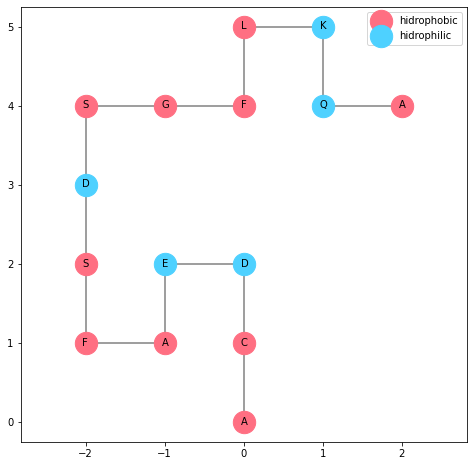

In [37]:

spatial_dic = get_spatial_dic("ACDEAFSDSGFLKQA",
                              "INNWSWNNNEENESE")
print(spatial_dic)
draw_protein(spatial_dic)